In [38]:
#Import the dependicies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime

In [39]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [70]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy
# api.openweathermap.org/data/2.5/weather?q=city&appid=d26e3f45135f0789f149c8e45356cfe2
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [43]:
# Create and Empty list to hold the weather data
city_data = []
#print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list
#for i in range(len(cities)):
for i, city in enumerate(cities):
        
    #Group cities in sets of 50 for logging purposes
    if(i % 50 ==0 and i > 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city.
    print(f"Processing Record{record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record1 of Set 1 | esperance
Processing Record2 of Set 1 | port alfred
Processing Record3 of Set 1 | general roca
Processing Record4 of Set 1 | whittlesea
Processing Record5 of Set 1 | kruisfontein
Processing Record6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record7 of Set 1 | leningradskiy
Processing Record8 of Set 1 | lompoc
Processing Record9 of Set 1 | kodinsk
Processing Record10 of Set 1 | punta arenas
Processing Record11 of Set 1 | samusu
City not found. Skipping...
Processing Record12 of Set 1 | leshukonskoye
Processing Record13 of Set 1 | atuona
Processing Record14 of Set 1 | of
City not found. Skipping...
Processing Record15 of Set 1 | tiwi
Processing Record16 of Set 1 | bambous virieux
Processing Record17 of Set 1 | bayir
Processing Record18 of Set 1 | urumqi
Processing Record19 of Set 1 | nanortalik
Processing Record20 of Set 1 | arraial do cabo
Processing Record21 of Set 1 | san jose
Proce

In [46]:
len(city_data)

562

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df= pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Esperance,-33.8667,121.9000,55.24,78,7,3.49,AU,2021-11-24 15:55:09
1,Port Alfred,-33.5906,26.8910,63.81,65,100,11.30,ZA,2021-11-24 15:55:09
2,General Roca,-39.0333,-67.5833,88.20,16,16,6.51,AR,2021-11-24 15:54:38
3,Whittlesea,-32.1759,26.8244,53.91,74,100,11.10,ZA,2021-11-24 15:55:09
4,Kruisfontein,-34.0033,24.7314,63.88,68,100,12.91,ZA,2021-11-24 15:55:10
5,Leningradskiy,69.3833,178.4167,-13.95,91,100,3.51,RU,2021-11-24 15:54:33
6,Lompoc,34.6391,-120.4579,64.09,67,20,4.00,US,2021-11-24 15:50:33
7,Kodinsk,58.6881,99.1844,11.03,98,91,4.16,RU,2021-11-24 15:55:10
8,Punta Arenas,-53.1500,-70.9167,48.11,61,62,16.87,CL,2021-11-24 15:55:11
9,Leshukonskoye,64.8989,45.7622,13.30,93,100,3.96,RU,2021-11-24 15:55:11


In [55]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [57]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Esperance,AU,2021-11-24 15:55:09,-33.8667,121.9000,55.24,78,7,3.49
1,Port Alfred,ZA,2021-11-24 15:55:09,-33.5906,26.8910,63.81,65,100,11.30
2,General Roca,AR,2021-11-24 15:54:38,-39.0333,-67.5833,88.20,16,16,6.51
3,Whittlesea,ZA,2021-11-24 15:55:09,-32.1759,26.8244,53.91,74,100,11.10
4,Kruisfontein,ZA,2021-11-24 15:55:10,-34.0033,24.7314,63.88,68,100,12.91
5,Leningradskiy,RU,2021-11-24 15:54:33,69.3833,178.4167,-13.95,91,100,3.51
6,Lompoc,US,2021-11-24 15:50:33,34.6391,-120.4579,64.09,67,20,4.00
7,Kodinsk,RU,2021-11-24 15:55:10,58.6881,99.1844,11.03,98,91,4.16
8,Punta Arenas,CL,2021-11-24 15:55:11,-53.1500,-70.9167,48.11,61,62,16.87
9,Leshukonskoye,RU,2021-11-24 15:55:11,64.8989,45.7622,13.30,93,100,3.96


In [58]:
#Create the output file(CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
#Extract relevant fields from teh dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

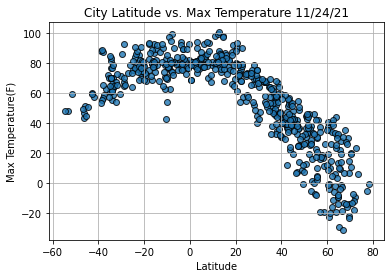

In [63]:
#Import time module
import time

#Build the scatter plot for latitude vs. Max Temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

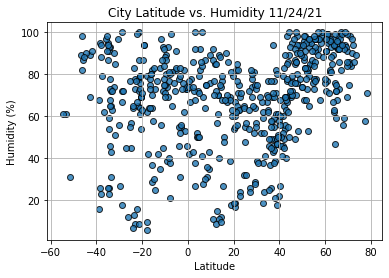

In [67]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

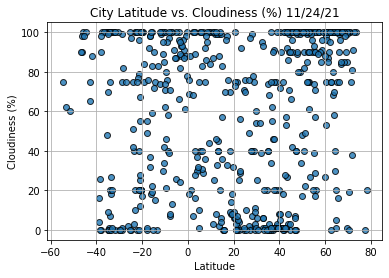

In [68]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

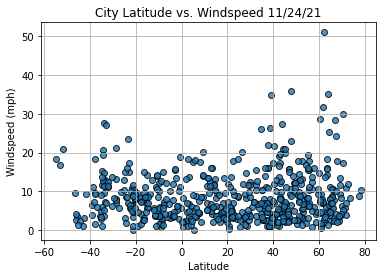

In [69]:
#Build the scatter plot for latitude vs. windspeed
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths=1, marker="o",
           alpha=.8, label = "Cities")
#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()

In [80]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemispher weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [81]:
index13 = city_data_df.loc[13]
index13

City                        Bayir
Country                        TR
Date          2021-11-24 15:55:12
Lat                       37.2687
Lng                       28.2167
Max Temp                    54.12
Humidity                       94
Cloudiness                     46
Wind Speed                   4.54
Name: 13, dtype: object

In [82]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
557     True
558    False
559     True
560     True
561    False
Name: Lat, Length: 562, dtype: bool

In [83]:
city_data_df.loc[(city_data_df["Lat"]>= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Leningradskiy,RU,2021-11-24 15:54:33,69.3833,178.4167,-13.95,91,100,3.51
6,Lompoc,US,2021-11-24 15:50:33,34.6391,-120.4579,64.09,67,20,4.00
7,Kodinsk,RU,2021-11-24 15:55:10,58.6881,99.1844,11.03,98,91,4.16
9,Leshukonskoye,RU,2021-11-24 15:55:11,64.8989,45.7622,13.30,93,100,3.96
11,Tiwi,PH,2021-11-24 15:55:12,13.4667,123.6167,74.46,89,99,4.09


In [84]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

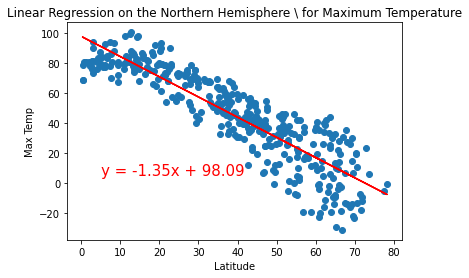

In [92]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(5,5))

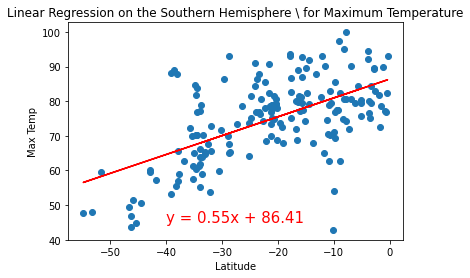

In [104]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-40,45))

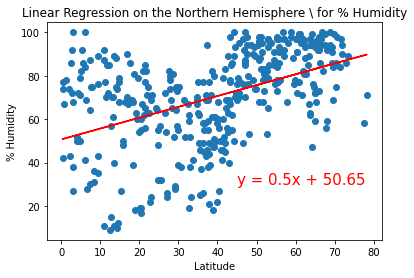

In [112]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(45,30))

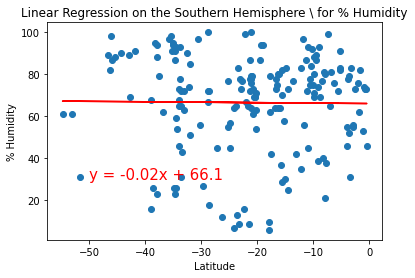

In [117]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,30))

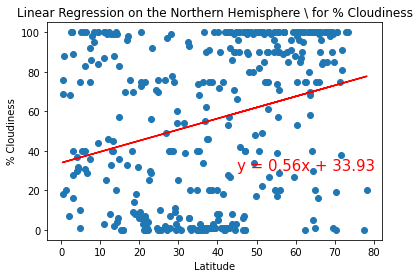

In [118]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(45,30))

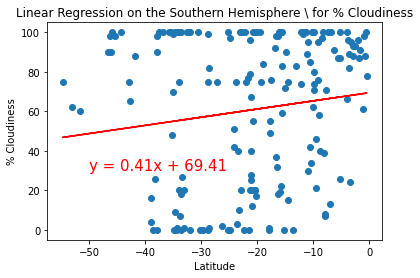

In [119]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,30))

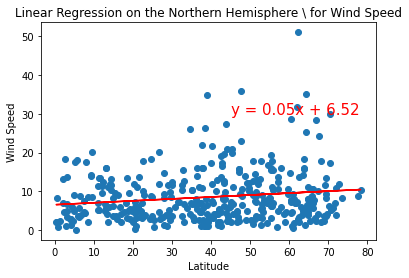

In [120]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(45,30))

In [ ]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,30))